In [257]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [258]:
Image_size = 256
Batch_size = 32
Channels = 3
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size =(Image_size,Image_size),
    batch_size = Batch_size
)

Found 2152 files belonging to 3 classes.


In [259]:
class_names=  dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [260]:
len(dataset)

68

In [261]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 2 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 2]


In [262]:
for image_batch,label_batch in dataset.take(1):
        # print(image_batch[0])
        # print(image_batch[0].numpy())
        print(image_batch[0].numpy().shape)

(256, 256, 3)


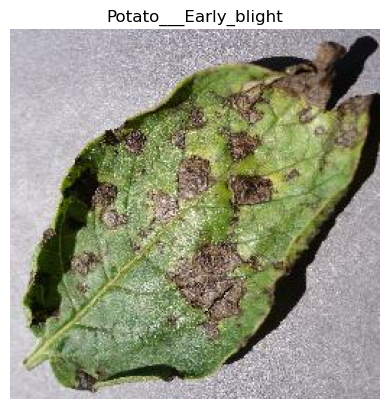

In [263]:
for image_batch,label_batch in dataset.take(1):
    # plt.imshow(image_batch[0].numpy())
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[0]])

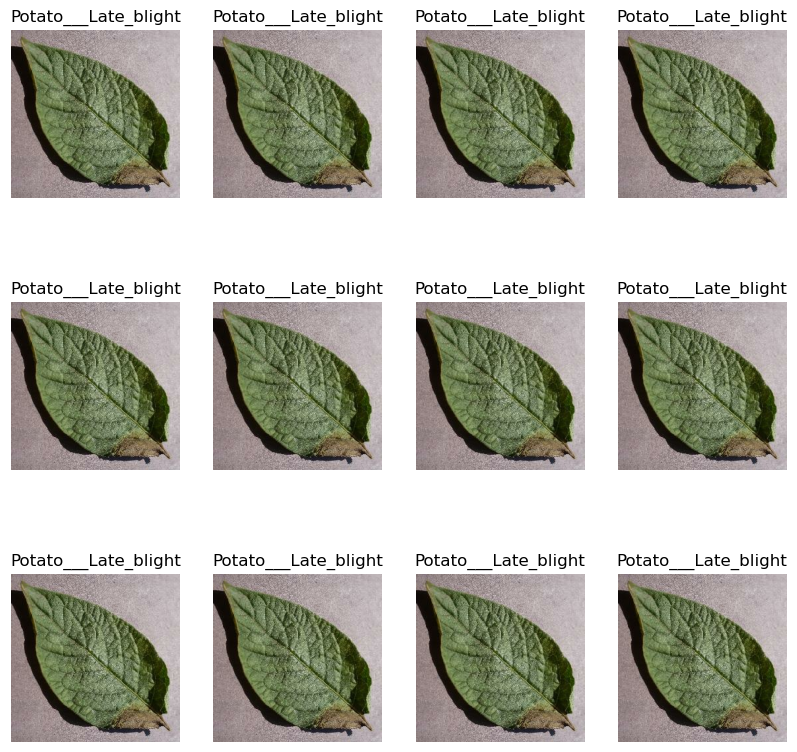

In [264]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for  i in range(12):
        ax = plt.subplot(3,4,i+1)
        # plt.imshow(image_batch[0].numpy())
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[0]])

In [265]:
Epochs =50

In [266]:
len(dataset)

68

In [267]:
# 80% ==> training
# 20% ==> 10% validation,10% test


In [268]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [269]:
train_ds = dataset.take(54)
len(train_ds)

54

In [270]:
test_ds = dataset.skip(54)
len(train_ds)

54

In [271]:
val_size = 0.1
len(dataset)*val_size

# so basically i need 6 sample from my test dataset

6.800000000000001

In [272]:
val_ds = test_ds.take(6)
len(val_ds)


6

In [273]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [274]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [275]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [276]:
len(train_ds)

54

In [277]:
len(val_ds)

6

In [278]:
len(test_ds)

8

In [279]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [280]:
# pip install tensorflow==2.6


ERROR: Could not find a version that satisfies the requirement tensorflow==2.6 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.6
Note: you may need to restart the kernel to use updated packages.


In [281]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [282]:
# resize_and_rescale = tf.keras.Sequential([
#   layers.experimental.preprocessing.Resizing(Image_size, Image_size),
#   layers.experimental.preprocessing.Rescaling(1./255),
# ])
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1./255),
])


In [283]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])